In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns

In [17]:
# Parameters
n_class = 35
n_iter  = 500

d_class = [19, 23, 7, 22, 8, 30, 6, 3, 12, 34]

classes_ac_tot = ["EIA", "RBBB", "LBBB", "LVH", "AF", "AFL", "AVB2M1", "WPW", "PMKR", "MAT", "STA", "PCVR", "SVES", "VES", "SB", "NECG", "NCVR", "SCVR",
                  "SA", "AI", "PIE", "AVB1", "LAFB", "LPFB", "RAD", "LAD", "CDRB", "CDLB", "SPRI", "PQTI", "SI", "PRWP", "EAR", "LAE", "ST"]

classes_ac = ["AI", "LPFB", "WPW", "LAFB", "PMKR", "SI", "AVB2MI", "LVH", "SVES", "ST"]

ordem_classes_en = ['Electrically Inactive Area',
 'Right Bundle Branch Block',
 'Left Bundle Branch Block',
 'Left Ventricular Hypertrophy',
 'Atrial Fibrilation',
 'Atrial Flutter',
 '2nd Degree Atrioventricular Block Mobitz I',
 'Wolff Parkinson White',
 'Pacemaker',
 'Multifocal Atrial Tachycardia',
 'Supraventricular Tachycardia',
 'Primary Repolarization Changes',
 'Supraventricular Extrasystoles',
 'Ventricular Extrasystoles',
 'Sinus Bradycardia',
 'Normal ECG',
 'Nonspecific Repolarization Changes',
 'Secondary Repolarization Changes',
 'Sinus Arrhythmia',
 'Analysis Impossible due to Absence of Electrocardiographic Signal',
 'Possible Inversion of Electrodes ',
 'First-Degree Atrioventricular Block',
 'Left Anterior Fascicular Block  ',
 'Left Posterior Fascicular Block  ',
 'Right Axis Deviation',
 'Left Axis Deviation',
 'Conduction Desorder of the Right Branch',
 'Conduction Desorder of the Left Branch',
 'Short PR Interval',
 'Prolonged QT Interval ',
 'Subendocardial Ischemia',
 'Poor R Wave Progression',
 'Ectopic Atrial Rhythm  ',
 'Left Atrial Enlargement',
 'Sinus Tachycardia']

ordem_classes_antigo = ['área_eletricamente_inativa',
       'Bloqueio_de_ramo_direito', 'Bloqueio_de_ramo_esquerdo',
       'Bloqueio_de_ramo_direito_e_bloqueio_divisional_anterossuperior_do_ramo_esquerdo',
       'Bloqueio_intraventricular_inespecífico',
       'Sobrecarga_ventricular_esquerda_(critérios_de_Romhilt-Estes)',
       'Sobrecarga_ventricular_esquerda_(critérios_de_voltagem)',
       'Fibrilação_atrial', 'Flutter_atrial',
       'Bloqueio_atrioventricular_de_2°_grau_Mobitz_I',
       'Bloqueio_atrioventricular_de_2°_grau_Mobitz_II',
       'Bloqueio_atrioventricular_2:1', 'Bloqueio_atrioventricular_avançado',
       'Bloqueio_atrioventricular_total',
       'Pré-excitação_ventricular_tipo_Wolff-Parkinson-White',
       'Sistema_de_estimulação_cardíaca_normofuncionante',
       'Sistema_de_estimulação_cardíaca_com_disfunção',
       'Taquicardia_atrial_multifocal', 'Taquicardia_atrial',
       'Taquicardia_supraventricular', 'Corrente_de_lesão_subendocárdica',
       'Alterações_primárias_da_repolarização_ventricular',
       'Extrassístoles_supraventriculares', 'Extrassístoles_ventriculares',
       'Bradicardia_sinusal',
       'ECG_dentro_dos_limites_da_normalidade_para_idade_e_sexo',
       'Alterações_da_repolarização_ventricular_atribuídas_à_ação_digitálica',
       'Alterações_inespecíficas_da_repolarização_ventricular',
       'Alterações_secundárias_da_repolarização_ventricular',
       'Arritmia_sinusal',
       'Ausência_de_sinal_eletrocardiográfico_que_impede_a_análise',
       'Interferência_na_linha_de_base_que_não_impede_a_análise_do_ECG',
       'Ausência_de_sinal_eletrocardiográfico_que_não_impede_a_análise',
       'Traçado_com_qualidade_técnica_insuficiente',
       'Possível_inversão_de_posicionamento_de_eletrodos',
       'Baixa_voltagem_em_derivações_precordiais',
       'Baixa_voltagem_em_derivações_periféricas',
       'Bloqueio_atrioventricular_de_1°_grau',
       'Bloqueio_de_ramo_direito_e_bloqueio_divisional_posteroinferior_do_ramo_esquerdo',
       'Bloqueio_divisional_anterossuperior_do_ramo_esquerdo',
       'Bloqueio_divisional_posteroinferior_do_ramo_esquerdo',
       'Desvio_do_eixo_do_QRS_para_direita',
       'Desvio_do_eixo_do_QRS_para_esquerda',
       'Dissociação_atrioventricular_isorrítmica',
       'Distúrbio_de_condução_do_ramo_direito',
       'Distúrbio_de_condução_do_ramo_esquerdo', 'Intervalo_PR_curto',
       'Intervalo_QT_prolongado', 'Isquemia_subendocárdica',
       'Progressão_lenta_de_R_nas_derivações_precordiais', 'Pausa_sinusal',
       'Corrente_de_lesão_subepicárdica',
       'Corrente_de_lesão_subepicárdica_-_provável_infarto_agudo_do_miocárdio_com_supradesnivelamento_de_ST',
       'Repolarização_precoce', 'Ritmo_atrial_ectópico',
       'Ritmo_atrial_multifocal', 'Ritmo_idioventricular_acelerado',
       'Ritmo_juncional', 'Síndrome_de_Brugada', 'Sobrecarga_atrial_direita',
       'Sobrecarga_atrial_esquerda', 'Sobrecarga_biatrial',
       'Sobrecarga_biventricular', 'Sobrecarga_ventricular_direita',
       'Sobrecarga_ventricular_esquerda(_critérios_de_voltagem)',
       'Taquicardia_sinusal', 'Taquicardia_ventricular_não_sustentada',
       'Taquicardia_ventricular_sustentada',
       'Suspeita_de_Síndrome_de_Brugada_repetir_V1-V2_em_derivações_superiores',
       'Taquicardia_juncional', 'Batimento_de_escape_atrial',
       'Batimento_de_escape_supraventricular', 'Batimento_de_escape_juncional',
       'Batimento_de_escape_ventricular']

In [7]:
# Data

valid = np.load("../light_data/new_classes.npy")[:,1]
true  = np.array([[row[i] for i in range(74) if valid[i]] for row in np.load("../light_data/gold_labels.npy")])
pm    = np.load("../processed_data/base1/bin_pm.npy")
lda   = np.array(pd.read_csv("../processed_data/base1/bin_lda.csv", header = None))
reg   = np.array(pd.read_csv("../processed_data/base1/bin_regex.csv", header = None))
tf    = np.load("../processed_data/base1/bin_tf.npy")

In [11]:
# Receives List, NpArray or Panda Series with Predicted and True Values. Returns arrays of sample with size n.
def bootstrap(pred, true, n):
    pred   = np.array(pred)
    true   = np.array(true)
    pop    = np.array([[pred[i], true[i]] for i in range(len(pred))])
    pop    = pd.DataFrame(pop)
    sample = pop.sample(n)
    
    # Repeats until finds
    times = 1
    while(times <= 20 and (sample.sum()[0] == 0 or sample.sum()[1] == 0)):
        sample = pop.sample(n)
        times += 1
    
    sample_pred = np.array(sample[0])
    sample_true = np.array(sample[1])
    return sample_true, sample_pred

In [20]:
from tqdm import tqdm

pre = []
rec = []
f1  = []
# Running for all classes...
print("Running PM...")
for c in tqdm(range(n_class)):
    for i in range(n_iter):
        x, y = bootstrap(pm[:,c], true[:,c], 100)
        p, r, f, _ = precision_recall_fscore_support(x, y, average = 'binary')
        pre.append([classes_ac_tot[c], "PM", p])
        rec.append([classes_ac_tot[c], "PM", r])
        f1.append( [classes_ac_tot[c], "PM", f])
    acro += 1
    
# Running for all classes...
print("Running TF...")
for c in tqdm(range(n_class)):
    for i in range(n_iter):
        x, y = bootstrap(tf[:,c], true[:,c], 100)
        p, r, f, _ = precision_recall_fscore_support(x, y, average = 'binary')
        pre.append([classes_ac_tot[c], "TF", p])
        rec.append([classes_ac_tot[c], "TF", r])
        f1.append( [classes_ac_tot[c], "TF", f])
    acro += 1

print("Running LDA...")
for c in tqdm(range(n_class)):
    for i in range(n_iter):
        x, y = bootstrap(lda[:,c], true[:,c], 100)
        p, r, f, _ = precision_recall_fscore_support(x, y, average = 'binary')
        pre.append([classes_ac_tot[c], "LDA", p])
        rec.append([classes_ac_tot[c], "LDA", r])
        f1.append( [classes_ac_tot[c], "LDA", f])

print("Running REG...")
for c in tqdm(range(n_class)):
    for i in range(n_iter):
        x, y = bootstrap(reg[:,c], true[:,c], 100)
        p, r, f, _ = precision_recall_fscore_support(x, y, average = 'binary')
        pre.append([classes_ac_tot[c], "REG", p])
        rec.append([classes_ac_tot[c], "REG", r])
        f1.append( [classes_ac_tot[c], "REG", f])

pre = np.array(pre)
rec = np.array(rec)
f1  = np.array(f1)

np.save("precision_all.npy", pre)
np.save("recall_all.npy", rec)
np.save("f1_all.npy", f1)

  0%|          | 0/35 [00:00<?, ?it/s]

Running PM...


  0%|          | 0/35 [00:00<?, ?it/s]

Running TF...


  0%|          | 0/35 [00:00<?, ?it/s]

Running LDA...


  0%|          | 0/35 [00:00<?, ?it/s]

Running REG...


100%|██████████| 35/35 [01:02<00:00,  1.79s/it]


In [17]:
from tqdm import tqdm

pre = []
rec = []
f1  = []
# Running for selected classes...
print("Running PM...")
acro = 0
for c in d_class:
    for i in range(n_iter):
        x, y = bootstrap(pm[:,c], true[:,c], 100)
        p, r, f, _ = precision_recall_fscore_support(x, y, average = 'binary')
        pre.append([classes_ac[acro], "PM", p])
        rec.append([classes_ac[acro], "PM", r])
        f1.append( [classes_ac[acro], "PM", f])
    acro += 1
    
# Running for all classes...
print("Running TF...")
acro = 0
for c in d_class:
    for i in range(n_iter):
        x, y = bootstrap(tf[:,c], true[:,c], 100)
        p, r, f, _ = precision_recall_fscore_support(x, y, average = 'binary')
        pre.append([classes_ac[acro], "TF", p])
        rec.append([classes_ac[acro], "TF", r])
        f1.append( [classes_ac[acro], "TF", f])
    acro += 1

print("Running LDA...")
acro = 0
for c in d_class:
    for i in range(n_iter):
        x, y = bootstrap(lda[:,c], true[:,c], 100)
        p, r, f, _ = precision_recall_fscore_support(x, y, average = 'binary')
        pre.append([classes_ac[acro], "LDA", p])
        rec.append([classes_ac[acro], "LDA", r])
        f1.append( [classes_ac[acro], "LDA", f])
    acro += 1

print("Running REG...")
acro = 0
for c in d_class:
    for i in range(n_iter):
        x, y = bootstrap(reg[:,c], true[:,c], 100)
        p, r, f, _ = precision_recall_fscore_support(x, y, average = 'binary')
        pre.append([classes_ac[acro], "REG", p])
        rec.append([classes_ac[acro], "REG", r])
        f1.append( [classes_ac[acro], "REG", f])
    acro += 1

pre = np.array(pre)
rec = np.array(rec)
f1  = np.array(f1)

np.save("precision.npy", pre)
np.save("recall.npy", rec)
np.save("f1.npy", f1)

Running PM...


IndexError: list index out of range

In [11]:
# pre = np.load("precision.npy")
# rec = np.load("recall.npy")
# f1  = np.load("f1.npy")

In [29]:
# Generates means

def make_mean(arr, metric):
    df = pd.DataFrame(arr, columns = ["Class", "Method", metric])
    df[metric] = df[metric].astype(float)
    df = df.groupby(["Class"]).agg(['mean', np.std])
    df[(metric, 'mean + std')] = df[(metric, 'mean')] + df[(metric, 'std')]
    df[(metric, 'mean - std')] = df[(metric, 'mean')] - df[(metric, 'std')]
    df.to_csv("base1/"+metric+"_all.csv")
    
make_mean(pre, "precision")
make_mean(rec, "recall")
make_mean(f1, "f1")

In [110]:
df.sort_values("Class")

Index(['LDA0', 'LDA1', 'LDA10', 'LDA11', 'LDA12', 'LDA13', 'LDA14', 'LDA15',
       'LDA16', 'LDA17',
       ...
       'REG31', 'REG32', 'REG33', 'REG34', 'REG4', 'REG5', 'REG6', 'REG7',
       'REG8', 'REG9'],
      dtype='object', name='Class', length=105)

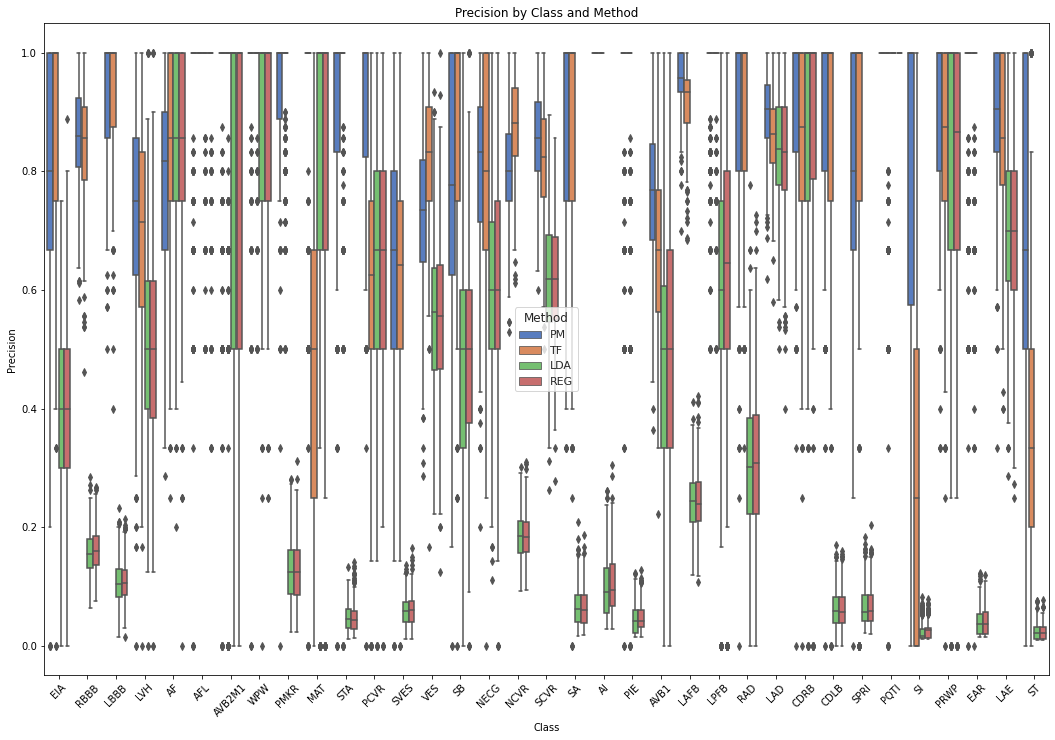

In [21]:
fig_dims = (18, 12)
fig, ax = plt.subplots(figsize=fig_dims)

# Plotting Precision
preDf = pd.DataFrame(pre, columns = ["Class", "Method", "Precision"])
preDf.set_index("Class")
preDf["Precision"] = preDf["Precision"].astype(float)
plt.title("Precision by Class and Method")
plt.xticks(rotation=45)
sns.set_theme(style="whitegrid")
sns.boxplot(x = "Class", y = "Precision", hue = "Method", data=preDf, palette = "muted", ax = ax)
plt.savefig("base1/precision_all.pdf")
plt.show()

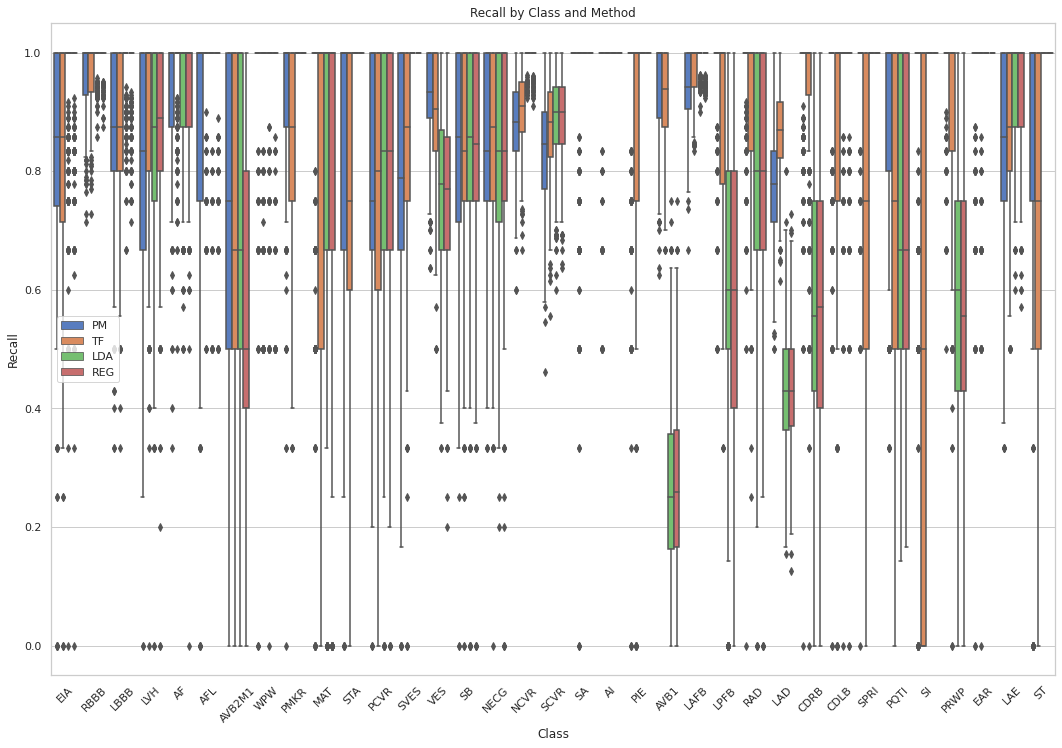

In [22]:
fig_dims = (18, 12)
fig, ax = plt.subplots(figsize=fig_dims)

# Plotting Recall
recDf = pd.DataFrame(rec, columns = ["Class", "Method", "Recall"])
recDf.set_index("Class")
recDf["Recall"] = recDf["Recall"].astype(float)
plt.title("Recall by Class and Method")
plt.xticks(rotation=45)
sns.set_theme(style="whitegrid")
sns.boxplot(x = "Class", y = "Recall", hue = "Method", data=recDf, palette = "muted", ax = ax)
plt.legend(loc="center left")
plt.savefig("base1/recall_all.pdf")
plt.show()

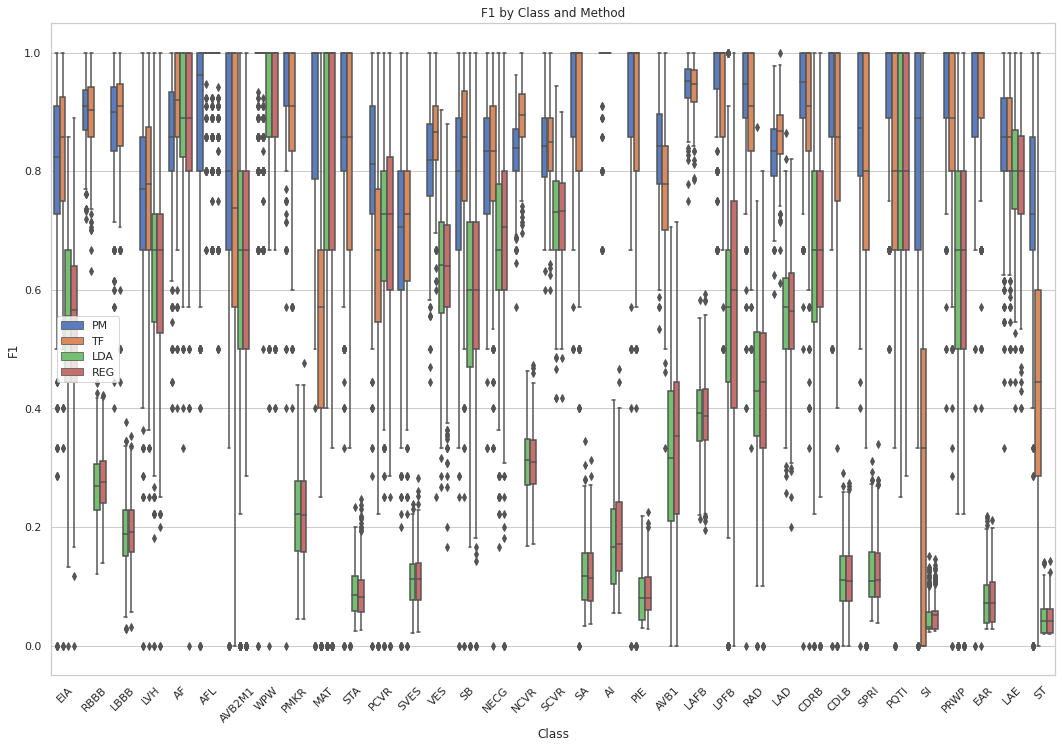

In [23]:
fig_dims = (18, 12)
fig, ax = plt.subplots(figsize=fig_dims)

# Plotting F1
f1Df = pd.DataFrame(f1, columns = ["Class", "Method", "F1"])
f1Df.set_index("Class")
f1Df["F1"] = f1Df["F1"].astype(float)
plt.title("F1 by Class and Method")
plt.xticks(rotation=45)
sns.set_theme(style="whitegrid")
sns.boxplot(x = "Class", y = "F1", hue = "Method", data=f1Df, palette = "muted", ax = ax)
plt.legend(loc="center left")
plt.savefig("base1/F1_all.pdf")
plt.show()

In [8]:
mp   = pd.read_csv("../processed_data/base2/resultados_bin_segundabase_mp.csv", sep = ';')
tf   = np.load("../processed_data/base2/bin_tf_best.npy")
true = np.array(mp)[:,1:11]
reg  = np.array(mp)[:,11:21]
pm   = np.array(mp)[:,21:31]
lda  = np.array(mp)[:,31:41]

# 1:11 Real
# 11:21 Regex
# 21:31 PM
# 31:41 LDA

In [4]:
nome_classes_mp = ["Chagas", "Schemic Cardiomyopathy", "Valvular Heart Disease", 
                  "Hypertrophic Cardiomyopathy", "Congenic Cardiopatics", "Long QT Syndrome",
                  "Brugada Syndrome", "Idiopathic Ventricular Fibrillation", "Arrhytthmogenic Dysplasia of VD", "Idiopathic Cardiomyopathy"]

In [12]:
from tqdm import tqdm
n_class = 10
n_iter  = 500

pre = []
rec = []
f1  = []
# Running for all classes

print("Running PM...")
for c in tqdm(range(n_class)):
    for i in range(n_iter):
        x, y = bootstrap(pm[:,c], true[:,c], 100)
        p, r, f, _ = precision_recall_fscore_support(x, y, average = 'binary')
        pre.append([nome_classes_mp[c], "PM", p])
        rec.append([nome_classes_mp[c], "PM", r])
        f1.append( [nome_classes_mp[c], "PM", f])
    
# Running for all classes...
print("Running TF...")
for c in tqdm(range(n_class)):
    for i in range(n_iter):
        x, y = bootstrap(tf[:,c], true[:,c], 100)
        p, r, f, _ = precision_recall_fscore_support(x, y, average = 'binary')
        pre.append([nome_classes_mp[c], "TF", p])
        rec.append([nome_classes_mp[c], "TF", r])
        f1.append( [nome_classes_mp[c], "TF", f])

print("Running LDA...")
for c in tqdm(range(n_class)):
    for i in range(n_iter):
        x, y = bootstrap(lda[:,c], true[:,c], 100)
        p, r, f, _ = precision_recall_fscore_support(x, y, average = 'binary')
        pre.append([nome_classes_mp[c], "LDA", p])
        rec.append([nome_classes_mp[c], "LDA", r])
        f1.append( [nome_classes_mp[c], "LDA", f])

print("Running REG...")
for c in tqdm(range(n_class)):
    for i in range(n_iter):
        x, y = bootstrap(reg[:,c], true[:,c], 100)
        p, r, f, _ = precision_recall_fscore_support(x, y, average = 'binary')
        pre.append([nome_classes_mp[c], "REG", p])
        rec.append([nome_classes_mp[c], "REG", r])
        f1.append( [nome_classes_mp[c], "REG", f])

pre = np.array(pre)
rec = np.array(rec)
f1  = np.array(f1)

np.save("base2/precision.npy", pre)
np.save("base2/recall.npy", rec)
np.save("base2/f1.npy", f1)

  0%|          | 0/10 [00:00<?, ?it/s]

Running PM...


  0%|          | 0/10 [00:00<?, ?it/s]

Running TF...


  0%|          | 0/10 [00:00<?, ?it/s]

Running LDA...


  0%|          | 0/10 [00:00<?, ?it/s]

Running REG...


 30%|███       | 3/10 [00:02<00:05,  1.25it/s]/home/pedrosa/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
100%|██████████| 10/10 [00:24<00:00,  2.44s/it]


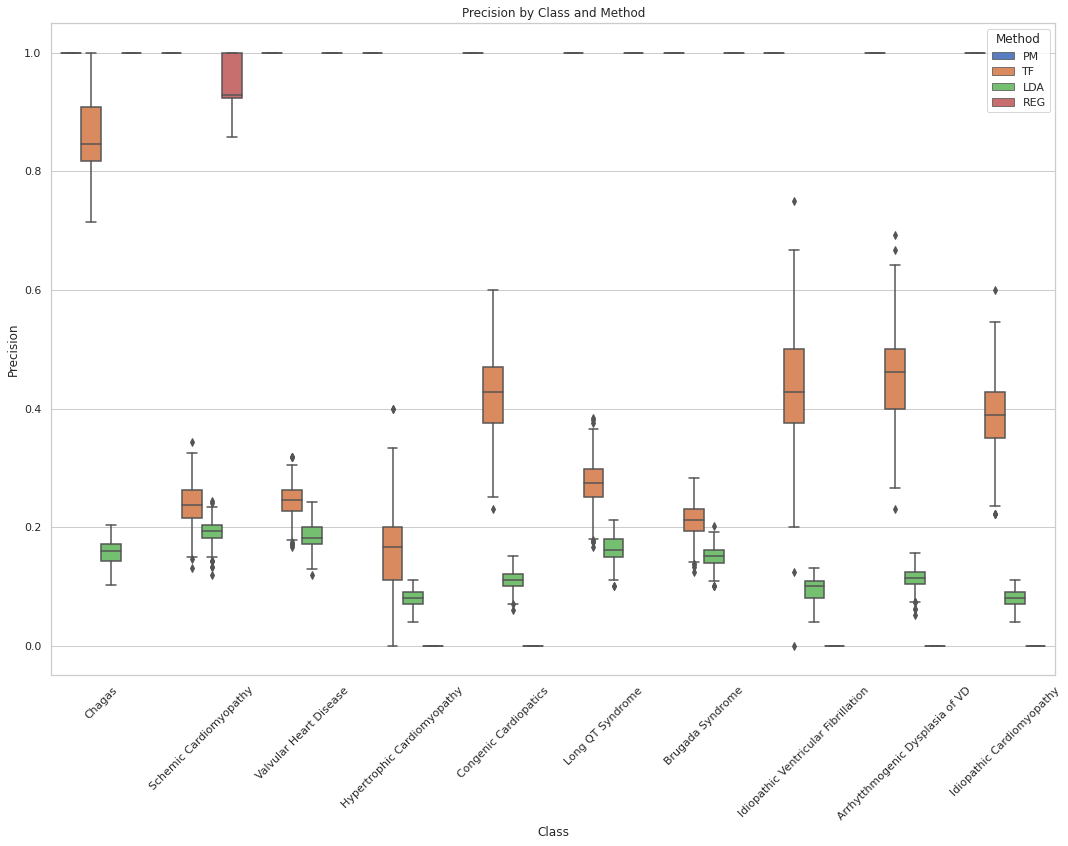

In [16]:
fig_dims = (18, 12)
fig, ax = plt.subplots(figsize=fig_dims)

# Plotting Precision
preDf = pd.DataFrame(pre, columns = ["Class", "Method", "Precision"])
preDf.set_index("Class")
preDf["Precision"] = preDf["Precision"].astype(float)
plt.title("Precision by Class and Method")
plt.xticks(rotation=45)
sns.set_theme(style="whitegrid")
sns.boxplot(x = "Class", y = "Precision", hue = "Method", data=preDf, palette = "muted", ax = ax)
plt.savefig("base1/precision_all.pdf")
plt.show()

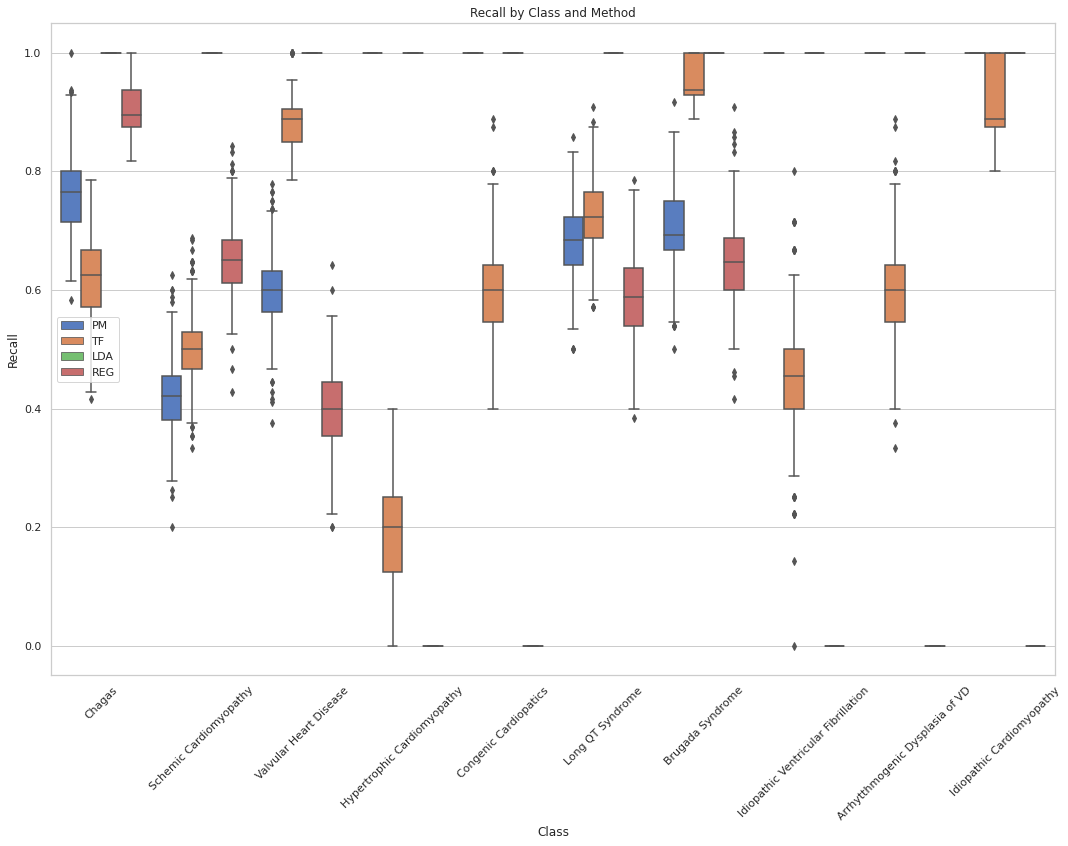

In [15]:
fig_dims = (18, 12)
fig, ax = plt.subplots(figsize=fig_dims)

# Plotting Recall
recDf = pd.DataFrame(rec, columns = ["Class", "Method", "Recall"])
recDf.set_index("Class")
recDf["Recall"] = recDf["Recall"].astype(float)
plt.title("Recall by Class and Method")
plt.xticks(rotation=45)
sns.set_theme(style="whitegrid")
sns.boxplot(x = "Class", y = "Recall", hue = "Method", data=recDf, palette = "muted", ax = ax)
plt.legend(loc="center left")
plt.savefig("base1/recall_all.pdf")
plt.show()

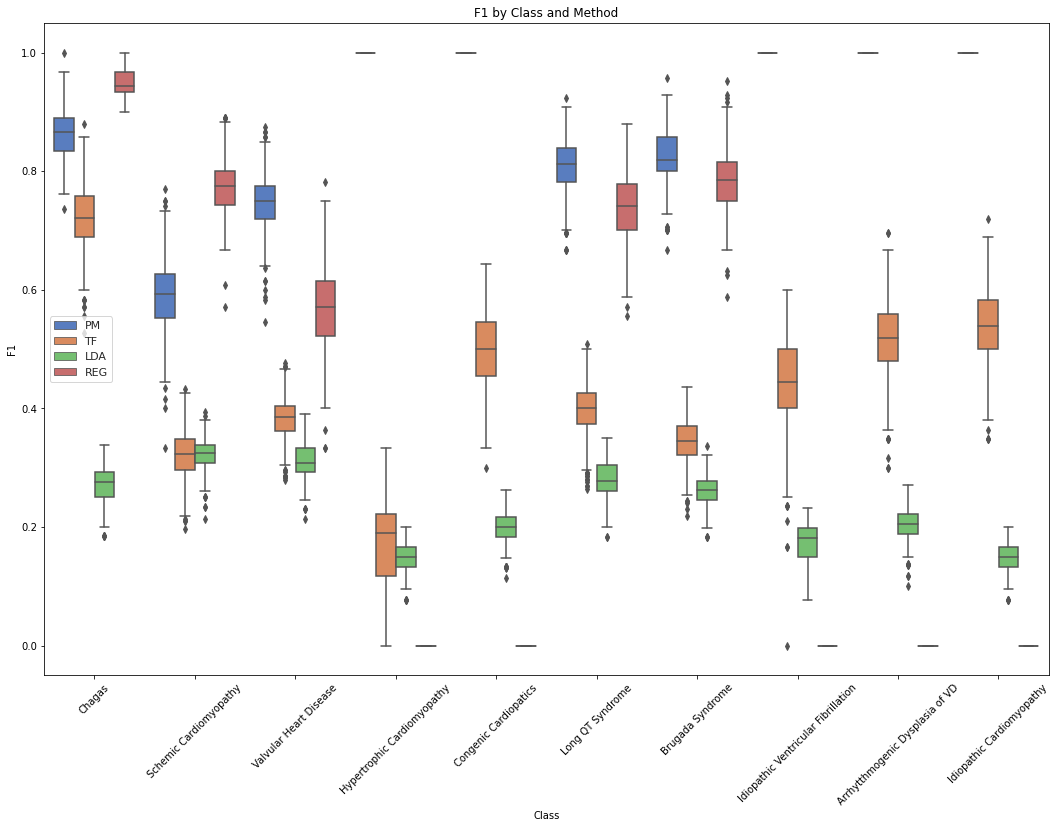

In [14]:
fig_dims = (18, 12)
fig, ax = plt.subplots(figsize=fig_dims)

# Plotting F1
f1Df = pd.DataFrame(f1, columns = ["Class", "Method", "F1"])
f1Df.set_index("Class")
f1Df["F1"] = f1Df["F1"].astype(float)
plt.title("F1 by Class and Method")
plt.xticks(rotation=45)
sns.set_theme(style="whitegrid")
sns.boxplot(x = "Class", y = "F1", hue = "Method", data=f1Df, palette = "muted", ax = ax)
plt.legend(loc="center left")
plt.savefig("base1/F1_all.pdf")
plt.show()

In [13]:
# Generates means

def make_mean(arr, metric):
    df = pd.DataFrame(arr, columns = ["Class", "Method", metric])
    df[metric] = df[metric].astype(float)
    df = df.groupby(["Class"]).agg(['mean', np.std])
    df[(metric, 'mean + std')] = df[(metric, 'mean')] + df[(metric, 'std')]
    df[(metric, 'mean - std')] = df[(metric, 'mean')] - df[(metric, 'std')]
    df.to_csv("base2/"+metric+".csv")
    
make_mean(pre, "precision")
make_mean(rec, "recall")
make_mean(f1, "f1")